# Regression

This exercise is about training regression models to predict numerical target values based on numerical input features.

**Where needed, make sure to use a random state of `42` to make your notebook content reproducible. Failing to do so will cost you a full point!**

## Deadline: Thursday, March 18 at 18:00

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


The dataset used in this notebook is about energy efficiency of buildings. The task is to predict heating and cooling load of a building based on numerical attributes of that building. More info about the dataset can be found [here](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency) and in the [original paper](http://people.maths.ox.ac.uk/tsanas/Preprints/ENB2012.pdf) ([alternative link](https://github.com/DarrenCook/h2o/blob/afc3ad23805f6599eae0183b075d5aaf1235e22c/datasets/ENB2012.pdf)).

First, the dataset is loaded from the UCI archive. It comes as an Excel sheet but Pandas can read those automatically. To get a first impression, the statistical summary of the data is printed.

Note: you may have to install the required *openpyxl*  package. To do that, just run the following command in your (anaconda) terminal:

```
pip install openpyxl
```

In [2]:
data = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx", 
                     usecols=range(0,10), nrows=768) # only read meaningful rows and columns
names=["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
data.columns= names # assign header names according to the info webpage
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


For examining the correlation between features the correlation matrix can be plotted:

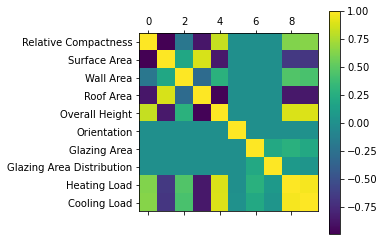

In [3]:
im = plt.matshow(data.corr())
yticks(range(data.shape[1]), data.columns)
plt.colorbar(im);

### Question 1

1. Which features in this dataset appear not to be important for prediction?
2. Why?

### Answer 1

1. 
2. 

It is necessary to split the table into input columns `X` and a target column `Y`. \
For simplicity, this exercise only uses the heating load (the cooling load is not used).

In [4]:
X = data.loc[:, "Relative Compactness":"Glazing Area Distribution"]
Y = data.loc[:, "Heating Load"]
X.shape, Y.shape

((768, 8), (768,))

### Exercise 1

Split the `X` and `Y` data into a training and a test set, using **20% of the data for the test set**.

Use the [scikit-learn function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for this. 
Make sure you configure it correctly.
Use `X_train, X_test, Y_train, Y_test` as the corresponding variable names.

In [ ]:
## poputlate X_train, X_test, Y_train, Y_test


X_train.shape

## Linear Regression


### Exercise 2

For the start, train a model using [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) with the training data.

In [ ]:
## train a LinearRegression model


### Exercise 3

Now predict the heating load for the buildings in your test set.

In [ ]:
## assign predictions to lin_pred


lin_pred.shape

### Exercise 4

Now compute the [**Root** Mean Squared Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation#Formula) of your predictions.

Once implement the simple RMSE formula yourself (using numpy functions) and then compare its outcome with the appropriate scikit learn function that computes the RMSE.

In [ ]:
## your own implementation of the RMSE using lin_pred from above
rmse= 
print(rmse)

## calculate and print the RMSE with scikit learn


### Question 2

What is the general value range of the RMSE?

### Answer 2



## Random Forest Regression

As an alternative to linear regression, try a random forest regressor now. This algorithm trains a bunch of decision trees (hence the name *forest*), each of which predicts a numerical value in the leaf nodes for the input sample.

### Exercise 5

Train a [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model on your training data. Just like before, use that model to predict heating load values for the samples in your test set and compute the RMSE value for this model.

In [ ]:
## random forest: train, predict, RMSE

rf_pred=

## save RMSE of the RF for later use
rmse= 

### Exercise 6

Just for comparison, let your model also predict the target values for the training set and compute the RMSE. This value should be much lower than the test set error, because these are the values the model already knows.

In [ ]:
## RMSE for the training data


### Question 3

How do you explain the difference in RMSE on the test set between linear regression and the random forest model?

### Answer 3



## Grid search

The RandomForestRegressor class has many hyper-parameters that can be tweaked to maybe achieve better performance. For example, you can use some of these parameters to regularize the trees and prevent overfitting.

### Exercise 6

Use [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to automatically try out different combinations of hyper-parameters for the random forest and find the parameters that achieve the highest prediction performance.

Based on the documentation for the `RandomForestRegressor` class, pick two parameters that you intuitively think *could* lead to a better result if they were optimized. Then create a parameter grid for these two parameters. This needs to be a list with a dictionary like this:

```
param_grid = [{"param1": [val1, val2, ...], "param2": [val1, val2, ...]}]
```

Choose five grid values for each of the two parameters. *Note:* you may include the default parameter value in the grid as well.

Make sure that the grid search algorithm scores the different forests by their RMSE, to be comparable to the previous experiment above (take a look at the `scoring` parameter).

Then, run the grid search and print the best combination of parameters that it found.

Finally, compute the RMSE of the best estimator on the test set and compare it to the RMSE you got for the RF above with default parameters.

**If you can find a set of parameters that leads to a lower RMSE than the defaults used above you get an extra point.**

In [ ]:
## GridSearchCV of your RandomForestRegressor from above

rmseCV= 
print(rmseCV)
print(rmse - rmseCV)

### Question 4

1. Which procedures involve random numbers? What are they used for?
2. How can you check if your notebook content is deterministic, i.e. reproducible?

### Answer 4

1. 
2. 